In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/eda-dataset-sa2/NSFG_2022_2023_FemRespPUFData.csv")
df.head()

,CaseID,RSCRAGE,RSCRNINF,RSCRHISP,RSCRRACE,FTFMODE,DEVICE_TYPE,AGE_R,AGESCRN,HISP,...,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,CMFIVYR,YEAR,QUARTER,PHASE1,PHASE2,PHASE3
0,96064,29,5,5,3,2,Mobile,29,29,5,...,1474,1441,1429,1417,1426,2,4,1,0,0
1,96066,18,5,1,4,2,PC,18,18,1,...,1471,1441,1429,1417,1423,2,2,1,1,1
2,96068,37,1,5,2,2,Mobile,37,37,5,...,1473,1441,1429,1417,1425,2,4,1,0,0
3,96071,40,1,5,3,2,PC,40,40,5,...,1468,1441,1429,1417,1420,2,2,1,0,0
4,96072,49,1,5,2,2,PC,49,49,5,...,1466,1441,1429,1417,1418,2,1,1,1,0


### Relevant Columns

In [2]:
columns_needed = [
    'AGE_R',        # Age
    'HIEDUC',       # Highest education level
    'POVERTY',      # Income as % of poverty threshold
    'RELIGION',     # Religious affiliation
    'INTCTFAM',     # Intact status of childhood family
    'vry1stag',     # Age at first sexual intercourse
    'FMARITAL',     # Marital status
    'CONSTAT1',     # Contraceptive method
    'GENHEALT',     # General health
    'OPPLIFENUM'    # Number of sex partners
]

# Subset the dataframe with only these columns
df_subset = df[columns_needed].copy()

In [3]:
df_subset.describe(include='all')

,AGE_R,HIEDUC,POVERTY,RELIGION,INTCTFAM,vry1stag,FMARITAL,CONSTAT1,GENHEALT,OPPLIFENUM
count,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,4554.000000,5586.000000,5586.000000,5579.000000,4652.000000
mean,32.362871,5.863409,314.300215,2.222521,1.308629,17.927097,3.360723,21.443609,2.376053,72.732803
std,9.532618,2.684175,202.459499,1.033755,0.461969,4.170320,1.880310,16.039503,1.066206,246.206924
min,15.000000,1.000000,50.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,4.000000,135.000000,1.000000,1.000000,15.000000,1.000000,6.000000,2.000000,2.000000
50%,33.000000,6.000000,292.000000,2.000000,1.000000,17.000000,5.000000,20.000000,2.000000,5.000000
75%,40.000000,8.000000,451.000000,3.000000,2.000000,19.000000,5.000000,40.000000,3.000000,10.000000
max,50.000000,11.000000,700.000000,4.000000,2.000000,97.000000,5.000000,42.000000,9.000000,999.000000


### Encoding

In [4]:
df_encoded = df_subset.copy()

# Mapping the label for each value
mappings = {
    'HIEDUC': {1: 'Below 9', 2: '9–11', 3: 'High school/GED', 4: 'Some college',
               5: 'Associate', 6: 'Bachelor', 7: 'Master', 8: 'Doctorate'},
    'FMARITAL': {1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated', 5: 'Never married'},
    'RELIGION': {1: 'No Religion', 2: 'Catholic', 3: 'Protestant', 4: 'Others'},
    'CONSTAT1': {1: "Female sterilization", 2: "Male sterilization", 3: "Hormonal implant", 5: "Depo-Provera (injectable)",
                 6: "Pill", 7: "Contraceptive Patch", 8: "Contraceptive Ring", 9: "Emergency contraception",
                 10: "IUD", 11: "Diaphragm (w/ or w/out jelly or cream)", 12: "(Male) Condom",
                 13: "Female condom/vaginal pouch", 19: "Periodic abstinence: NFP/cervical mucus/temperature",
                 20: "Periodic abstinence: calendar rhythm", 21: "Withdrawal", 22: "Other method",
                 30: "Pregnant", 31: "Seeking Pregnancy", 32: "Postpartum", 33: "Sterile - nonsurgical - female",
                 34: "Sterile - nonsurgical - male", 35: "Sterile - surgical - female (noncontraceptive)", 
                 38: "Sterile - unknown reasons - male", 40: "Other nonuser - never had intercourse",
                 41: "Other nonuser - has had intercourse, not in last 3 months",
                 42: "Other nonuser - had intercourse in last 3 months"},
    'INTCTFAM': {1: 'Had two parents', 2: 'Did not have two parents'},
    'GENHEALT': {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
}

for col, mapping in mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)

In [5]:
# Further grouping the categories for contraceptive methods
# Mapping the label for each value of CONSTAT1
method_mapping = {
    # Barrier
    '(Male) Condom': 'Barrier',

    # Hormonal
    'Pill': 'Hormonal',
    'Depo-Provera (injectable)': 'Hormonal',
    'Hormonal implant': 'Hormonal',
    'Contraceptive Ring': 'Hormonal',

    # Sterile
    'Female sterilization': 'Sterile',
    'Male sterilization': 'Sterile',
    'Sterile - nonsurgical - female': 'Sterile',
    'Sterile - nonsurgical - male': 'Sterile',
    'Sterile - surgical - female (noncontraceptive)': 'Sterile',

    # Natural
    'Withdrawal': 'Natural',
    'Periodic abstinence: calendar rhythm': 'Natural',
    'Periodic abstinence: NFP/cervical mucus/temperature': 'Natural',

    # Nonuser
    'Other nonuser - never had intercourse': 'Nonuser',
    'Other nonuser - has had intercourse, not in last 3 months': 'Nonuser',
    'Other nonuser - had intercourse in last 3 months': 'Nonuser',

    # Other/Contextual
    'Pregnant': 'Other',
    'Postpartum': 'Other',
    'Seeking Pregnancy': 'Other',
    'Emergency contraception': 'Other',
}

# CONSTAT1 replaced with CONSTAT1_GROUPED
df_encoded['CONSTAT1_GROUPED'] = df_encoded['CONSTAT1'].replace(method_mapping)
df_encoded = df_encoded.drop(columns=['CONSTAT1'])

In [6]:
# Define poverty category function
def categorize_poverty(pct):
    if pct < 100:
        return "Below Poverty"
    elif 100 <= pct < 200:
        return "Near Poverty"
    elif 200 <= pct < 400:
        return "Above Poverty"
    else:
        return "Well Above Poverty"

# Apply the categorization
df_encoded['POVERTY'] = df_encoded['POVERTY'].apply(categorize_poverty)

In [7]:
# Define age category function
def categorize_age(age):
    if 15 <= age < 18:
        return "15-17"
    elif 18 <= age < 24:
        return "18-23"
    elif 24 <= age < 36:
        return "24-35"
    else:
        return "Above 35"

# Apply the categorization
df_encoded['AGE_R'] = df_encoded['AGE_R'].apply(categorize_age)

In [8]:
# Define age at first sex category function
def categorize_age_fs(age_fs):
    if age_fs <= 12:
        return "Under 13"
    elif 13 <= age_fs < 18:
        return "13-17"
    elif 18 <= age_fs < 24:
        return "18-23"
    else:
        return "Above 23"

# Apply the categorization
df_encoded['vry1stag'] = df_encoded['vry1stag'].apply(categorize_age_fs)

In [9]:
# Define number of sex partners category function
def categorize_partner(partner):
    if partner == 1:
        return "One"
    elif 2 <= partner < 5:
        return "Few"
    elif 5 <= partner < 10:
        return "Several"
    elif 10 <= partner < 20:
        return "Many"
    else:
        return "Plenty"

# Apply the categorization
df_encoded['OPPLIFENUM'] = df_encoded['OPPLIFENUM'].apply(categorize_partner)

### Adjusting Variable Data Type 

In [10]:
# Ordinal encoding
ordinal_cols = {
    'OPPLIFENUM': ['One', 'Few', 'Several', 'Many', 'Plenty'],
    'GENHEALT': ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
    'vry1stag': ['Under 13', '13-17', '18-23', 'Above 23'],
    'AGE_R': ['15-17', '18-23', '24-35', 'Above 35'],
    'HIEDUC': ['Below 9', '9–11', 'High school/GED', 'Some college', 'Associate', 'Bachelor', 'Master', 'Doctorate'],
    'POVERTY': ['Below Poverty', 'Near Poverty', 'Above Poverty', 'Well Above Poverty'],
}

for col, order in ordinal_cols.items():
    df_encoded[col] = pd.Categorical(df_encoded[col], categories=order, ordered=True)

### Missing Values and Few Observations

In [11]:
import numpy as np

# Define missing values as lists for consistency
HIEDUC_missing_values = [9, 10, 11]
vry1stag_missing_values = [97]
OPPLIFENUM_missing_values = [998, 999]
GENHEALT_missing_values = [8, 9]

# Replace with NaN (overwrite the values)
df_encoded['HIEDUC'] = df_encoded['HIEDUC'].replace(HIEDUC_missing_values, np.nan)
df_encoded['vry1stag'] = df_encoded['vry1stag'].replace(vry1stag_missing_values, np.nan)
df_encoded['OPPLIFENUM'] = df_encoded['OPPLIFENUM'].replace(OPPLIFENUM_missing_values, np.nan)
df_encoded['GENHEALT'] = df_encoded['GENHEALT'].replace(GENHEALT_missing_values, np.nan)

In [12]:
df_encoded.isnull().sum()

AGE_R                 0
HIEDUC              976
POVERTY               0
RELIGION              0
INTCTFAM              0
vry1stag              0
FMARITAL              0
GENHEALT             39
OPPLIFENUM            0
CONSTAT1_GROUPED      0
dtype: int64

In [13]:
df_cleaned = df_encoded.dropna()

In [14]:
df_cleaned.isnull().sum()

AGE_R               0
HIEDUC              0
POVERTY             0
RELIGION            0
INTCTFAM            0
vry1stag            0
FMARITAL            0
GENHEALT            0
OPPLIFENUM          0
CONSTAT1_GROUPED    0
dtype: int64

In [15]:
df_cleaned.shape

(4575, 10)

In [16]:
df_cleaned['CONSTAT1_GROUPED'].value_counts()

CONSTAT1_GROUPED
Nonuser                                   1454
Sterile                                   1097
Hormonal                                   755
Other                                      373
IUD                                        355
Barrier                                    269
Natural                                    251
Contraceptive Patch                         15
Other method                                 3
Diaphragm (w/ or w/out jelly or cream)       1
Sterile - unknown reasons - male             1
Female condom/vaginal pouch                  1
Name: count, dtype: int64

In [17]:
# Drop sparse classes for CONSTAT1_GROUPED
rare_classes = [
    'Diaphragm (w/ or w/out jelly or cream)',
    'Female condom/vaginal pouch',
    'Other method',
    'Contraceptive Patch',
    'Sterile - unknown reasons - male'
]

df_cleaned = df_cleaned[~df_cleaned['CONSTAT1_GROUPED'].isin(rare_classes)]

### Contingency  Tables
#### 1. Education vs. Contraceptive Use

In [18]:
educ_vs_contraceptive = pd.crosstab(df_cleaned['CONSTAT1_GROUPED'], df_cleaned['HIEDUC'])
educ_vs_contraceptive

HIEDUC,Below 9,9–11,High school/GED,Some college,Associate,Bachelor,Master,Doctorate
CONSTAT1_GROUPED,,,,,,,,
Barrier,17,11,2,46,55,26,13,99
Hormonal,92,20,15,141,181,42,36,228
IUD,19,6,11,39,65,33,30,152
Natural,9,6,10,42,65,22,14,83
Nonuser,349,61,36,274,269,79,77,309
Other,29,17,16,81,69,26,25,110
Sterile,103,45,62,169,241,121,82,274


#### 2. Religion vs. age at first sex

In [19]:
rel_vs_vry1stag = pd.crosstab(df_cleaned['RELIGION'], df_cleaned['vry1stag'])
rel_vs_vry1stag

vry1stag,Under 13,13-17,18-23,Above 23
RELIGION,,,,
Catholic,18,289,251,259
No Religion,46,736,406,380
Others,16,138,104,154
Protestant,61,811,492,393


#### 3. General health vs. Number of opposite-sex patners

In [20]:
health_vs_partners = pd.crosstab(df_cleaned['GENHEALT'], df_cleaned['OPPLIFENUM'])
health_vs_partners

OPPLIFENUM,One,Few,Several,Many,Plenty
GENHEALT,,,,,
Excellent,197,200,153,82,297
Very Good,285,370,275,162,483
Good,227,334,299,173,455
Fair,61,98,91,47,162
Poor,12,19,24,14,34


#### 4. Poverty level vs. marital status

In [21]:
poverty_vs_marital = pd.crosstab(df_cleaned['POVERTY'], df_cleaned['FMARITAL'])
poverty_vs_marital

FMARITAL,Divorced,Married,Never married,Separated,Widowed
POVERTY,,,,,
Below Poverty,83,157,737,48,7
Near Poverty,50,263,609,28,7
Above Poverty,97,440,669,21,3
Well Above Poverty,66,593,665,9,2


### Chi-Square Test

In [22]:
from scipy.stats import chi2_contingency

table_list = [educ_vs_contraceptive, rel_vs_vry1stag, health_vs_partners, poverty_vs_marital]
table_name = ['Education vs. contraceptive use', 'Religion vs. age at first sex',
              'General health vs. number of opposite-sex partner', 'Poverty level vs. marital status']

chi2_results = []
for i in range(len(table_list)):
    chi2, p, dof, expected = chi2_contingency(table_list[i])
    chi2_results.append({
        'Comparison': table_name[i],
        'Chi-square': chi2,
        'p-value': p,
        'df': dof
    })
    
chi2_df = pd.DataFrame(chi2_results)
chi2_df

,Comparison,Chi-square,p-value,df
0,Education vs. contraceptive use,371.582669,2.266653e-54,42
1,Religion vs. age at first sex,79.875308,1.710974e-13,9
2,General health vs. number of opposite-sex partner,35.777128,3.106796e-03,16
3,Poverty level vs. marital status,286.406587,3.338153e-54,12


#### **1. Education vs. Contraceptive Use**
* **Chi-square**: 371.58
* **p-value**: 2.27 × 10⁻⁵⁴
* **df (degrees of freedom)**: 42
* **Interpretation**:
    * There is a **highly and statistically significant association** between education level and contraceptive method used. The very low p-value indicates that contraceptive preferences **vary significantly across educational backgrounds**. This makes sense—education often affects knowledge, access, and attitudes toward reproductive health.
 
#### **2. Religion vs. Age at First Sex**
* **Chi-square**: 79.88
* **p-value**: 1.71 × 10⁻¹³
* **df (degrees of freedom)**: 9
* **Interpretation**:
    * There is a **strong significant association** between religious affiliation and the **age at first sexual intercourse**. Religious beliefs may influence norms around abstinence, sexual behavior, and timing of first sex. The relationship is unlikely to be due to chance.
 
#### **3. General Health vs. Number of Opposite-Sex Partners**
* **Chi-square**: 35.78
* **p-value**: 0.0031
* **df (degrees of freedom)**: 16
* **Interpretation**:
    * There is a **statistically significant association**, though weaker than others. General health status may be related to the number of opposite-sex partners — possibly reflecting behavioral or socioeconomic factors affecting both.
 
#### **4. Poverty Level vs. Marital Status**
* **Chi-square**: 289.34
* **p-value**: 8.12 × 10⁻⁵⁵
* **df (degrees of freedom)**: 12
* **Interpretation**:
    * There is an **extremely strong and significant association** between poverty level and marital status. Lower-income individuals may have different patterns in marriage or separation compared to those above the poverty line — possibly due to economic barriers, social norms, or stress-related factors.

### Visualization

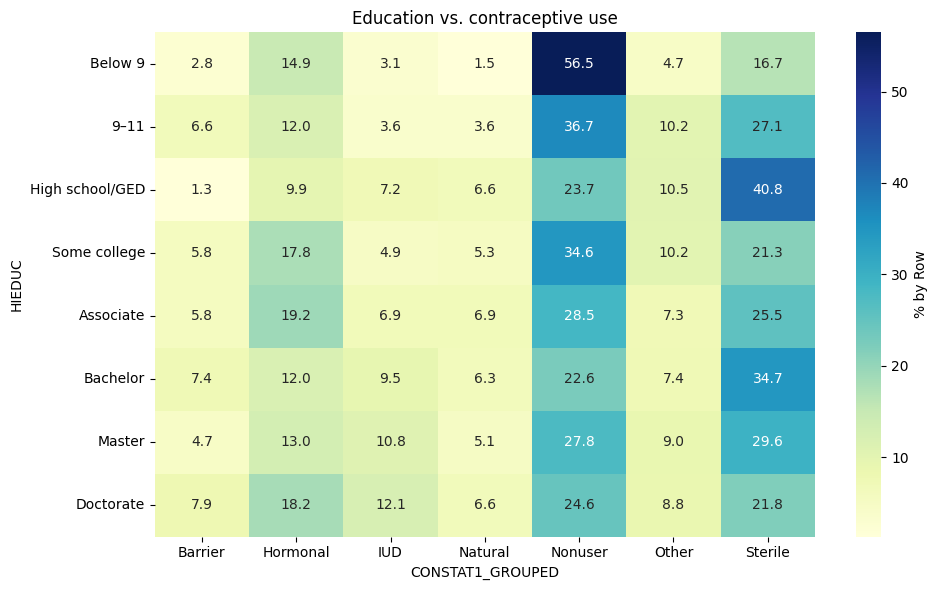

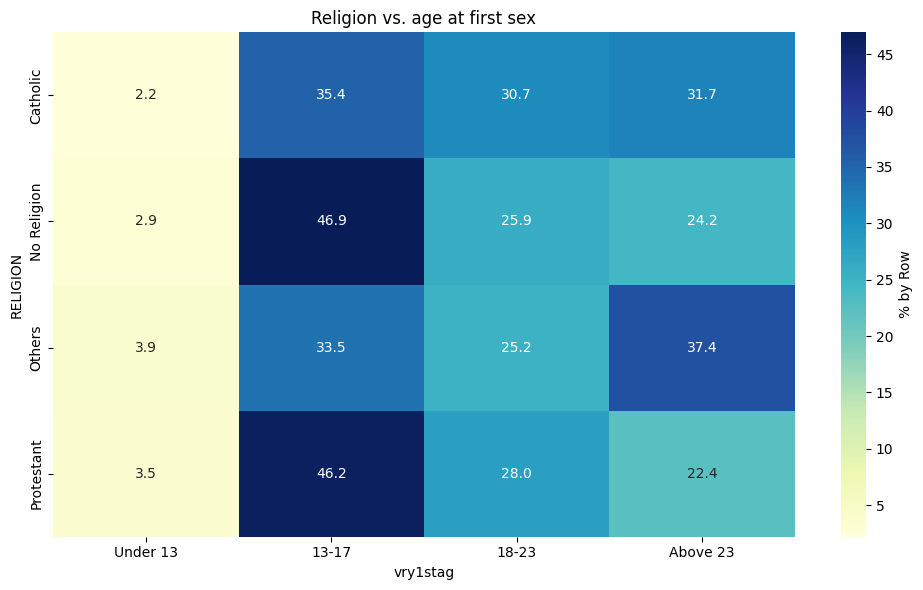

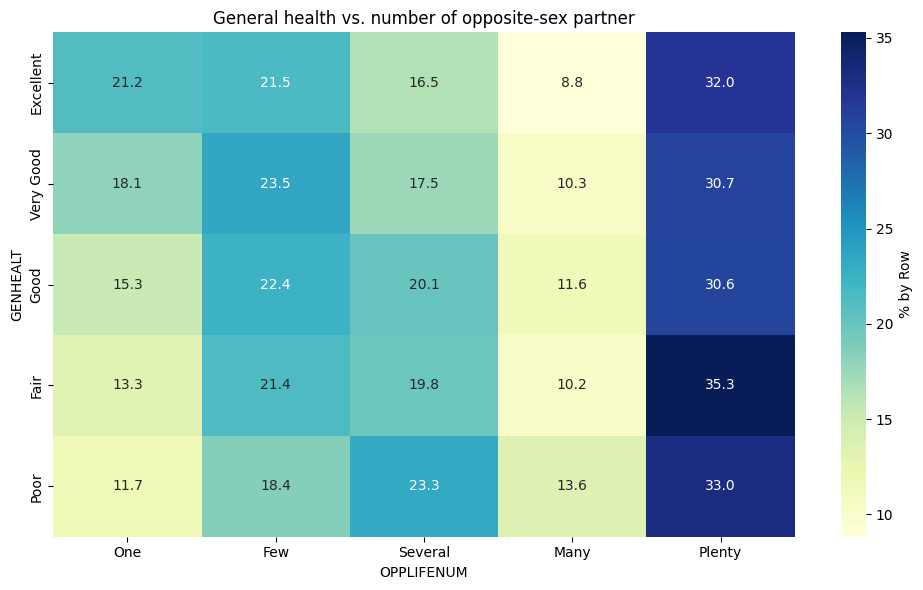

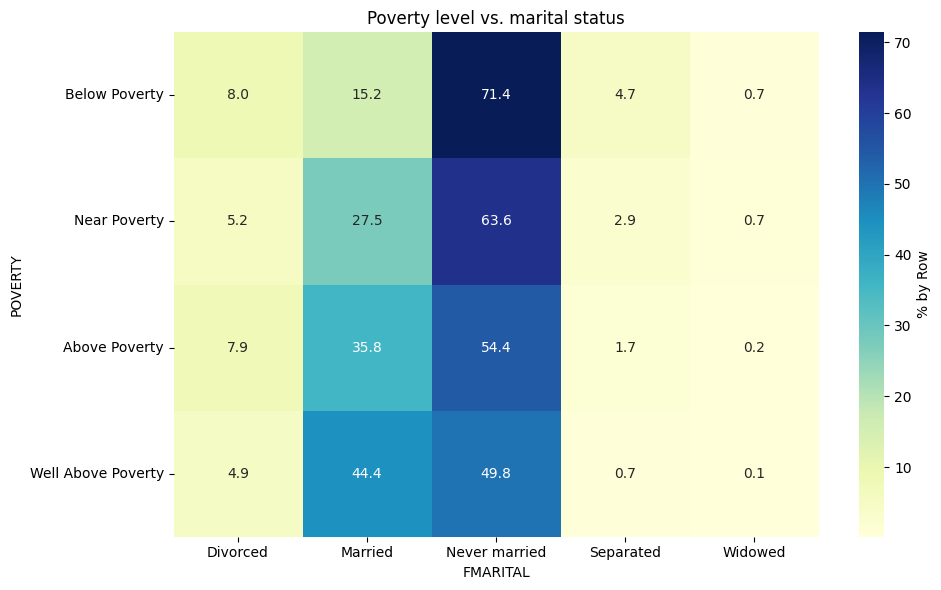

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

pairs = [
    ('HIEDUC', 'CONSTAT1_GROUPED'),
    ('RELIGION', 'vry1stag'),
    ('GENHEALT', 'OPPLIFENUM'),
    ('POVERTY', 'FMARITAL')
]

titles = [
    'Education vs. contraceptive use',
    'Religion vs. age at first sex',
    'General health vs. number of opposite-sex partner',
    'Poverty level vs. marital status'
]

for i, (var1, var2) in enumerate(pairs):
    plt.figure(figsize=(10, 6))
    crosstab = pd.crosstab(df_cleaned[var1], df_cleaned[var2], normalize='index') * 100
    sns.heatmap(crosstab, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '% by Row'})
    plt.title(titles[i])
    plt.ylabel(var1)
    plt.xlabel(var2)
    plt.tight_layout()

    # Sanitize title to create a safe filename
    safe_title = re.sub(r'[^\w\s-]', '', titles[i]).replace(" ", "_").lower()
    filename = f"{safe_title}.png"
    plt.savefig(filename, dpi=300)
    
    plt.show()


### Ordinal Logistic Regression
#### One-hot encoding

In [24]:
df_ordinal_log_reg = df_cleaned.copy()

# One-hot encode nominal variables
df_ordinal_log_reg = pd.get_dummies(df_ordinal_log_reg, columns=['RELIGION', 'INTCTFAM', 'FMARITAL', 'CONSTAT1_GROUPED'], drop_first=True)

# Ordinal encoding
ordinal_cols = {
    'OPPLIFENUM': ['One', 'Few', 'Several', 'Many', 'Plenty'],
    'GENHEALT': ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
    'vry1stag': ['Under 13', '13-17', '18-23', 'Above 23'],
    'AGE_R': ['15-17', '18-23', '24-35', 'Above 35'],
    'HIEDUC': ['Below 9', '9–11', 'High school/GED', 'Some college', 'Associate', 'Bachelor', 'Master', 'Doctorate'],
    'POVERTY': ['Below Poverty', 'Near Poverty', 'Above Poverty', 'Well Above Poverty'],
}

for col, order in ordinal_cols.items():
    df_ordinal_log_reg[col] = pd.Categorical(df_ordinal_log_reg[col], categories=order, ordered=True)
    df_ordinal_log_reg[col] = df_ordinal_log_reg[col].cat.codes

### X and Y

In [25]:
# Define X and y
y = pd.Categorical(df_ordinal_log_reg['OPPLIFENUM'], ordered=True)
X = df_ordinal_log_reg.drop(columns=['OPPLIFENUM'])
X = X.astype({col: 'int' for col in X.columns if X[col].dtype == 'bool'})

In [26]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Model fitting
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

# Create DataFrame
fit_df = pd.DataFrame({
    'Metric': ['Log-Likelihood', 'AIC', 'Converged'],
    'Value': [result.llf, result.aic, result.mle_retvals['converged']]
})

# Data Frame
fit_df

Optimization terminated successfully.
         Current function value: 1.470531
         Iterations: 109
         Function evaluations: 111
         Gradient evaluations: 111


,Metric,Value
0,Log-Likelihood,-6696.79871
1,AIC,13439.597419
2,Converged,True


#### Interpretation
* **Log-Likelihood**
  * The model has a log-likelihood of -6696.8, which indicates an acceptable fit for ordinal logistic regression on social data.
* **AIC (Akaike Information Criterion)**
  * The AIC value of 13,440 suggests a balance between model fit and simplicity. This can be used for comparison if multiple models are tested.
* **Convergence**
  * The model converged successfully, indicating the estimated parameters are statistically reliable.

In [27]:
# Extract odds ratios and confidence intervals
odds_ratios = np.exp(result.params)
conf_int = np.exp(result.conf_int())
coefficients = result.params
p_values = result.pvalues

# Create DataFrame
or_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'CI Lower (95%)': conf_int[0],
    'CI Upper (95%)': conf_int[1],
    'p-value': p_values
})

# Drop cutpoints (e.g., '0/1', '1/2', etc.)
or_df = or_df[~or_df.index.str.contains(r'^\d+/\d+$')]
or_df

,Coefficient,Odds Ratio,CI Lower (95%),CI Upper (95%),p-value
AGE_R,-0.165110,0.847800,0.783705,0.917138,3.846385e-05
HIEDUC,-0.028148,0.972245,0.945658,0.999578,4.661600e-02
POVERTY,0.086903,1.090791,1.034576,1.150062,1.286083e-03
vry1stag,0.211503,1.235534,1.149587,1.327907,8.952375e-09
GENHEALT,0.099107,1.104184,1.045200,1.166497,4.027464e-04
RELIGION_No Religion,0.507521,1.661168,1.417341,1.946941,3.694130e-10
RELIGION_Others,0.154429,1.166992,0.933590,1.458746,1.749735e-01
RELIGION_Protestant,0.349327,1.418113,1.215232,1.654865,9.224154e-06
INTCTFAM_Had two parents,-0.250334,0.778541,0.692835,0.874849,2.589265e-05
FMARITAL_Married,-1.019873,0.360641,0.290479,0.447750,2.484202e-20


#### Interpretation
* **AGE_R** (Age)
    * For each increase in age group, the odds of being in a higher category of opposite-sex partners decrease by 15.2%.
    * Older respondents are less likely to report more partners.
* **HIEDUC** (Education Level)
    * Not statistically significant at 0.05 (p = 0.047 borderline).
    * Slight negative effect: more education may be associated with fewer partners, but this effect is weak.
* **POVERTY** (Poverty Level)
    * For each increase in poverty level, the odds of reporting more partners increase by 9.1%.
    * Suggests possible link between economic status and sexual behavior.
* **vry1stag** (Age at First Sex)
    * Each increase in age group of first sex increases odds of more partners by 23.6%.
    * This seems counterintuitive — may reflect categorization. Possibly, “older first sex” may cluster with specific behaviors later.
* **GENHEALT** (General Health)
    * Better general health is associated with 10.4% higher odds of reporting more partners.
* **RELIGION**
    * **No Religion**: 66% higher odds of having more partners than Catholics (baseline).
    * **Protestant**: 41.8% higher odds.
* **INTCTFAM_Had two parents** (Had two parents)
    * Individuals from two-parent households are 22.2% less likely to report higher partner counts.
* **FMARITAL** (Marital Status)
    * **Married**: 64% lower odds of more partners.
    * **Never married**: 33% lower odds
    * **Separated/Widowed**: Even lower odds, suggesting marital status strongly predicts behavior.
* **CONSTAT1_GROUPED**
    * **Hormonal**: Users are 68% more likely to be in higher categories
    * **IUD**: Double the odds of reporting more partners
    * **Natural**: Strong positive association
    * **Nonuser**: Very strong predictor of high partner count
    * **Other**: Similar to hormonal methods
    * **Sterile**: Strong positive odds

#### Summary
The ordinal logistic regression model significantly predicts the number of opposite-sex partners based on variables such as age, poverty level, marital status, religion, and contraceptive method. For example, individuals using IUDs had 2.0 times higher odds of reporting more partners compared to the baseline group. Nonusers had 3.4 times higher odds. Additionally, being older, married, or from a two-parent household decreased the likelihood of reporting higher partner counts. The model converged successfully, and fit statistics (AIC = 13,440) indicate acceptable performance for social science data.

###  Multinomial Logistic Regression
#### Encoding

In [28]:
df_multi_log_reg = df_cleaned.copy()

# One-hot encode nominal variables
df_multi_log_reg = pd.get_dummies(df_multi_log_reg, columns=['RELIGION', 'INTCTFAM', 'FMARITAL'], drop_first=True)

# Ordinal encoding
ordinal_cols = {
    'OPPLIFENUM': ['One', 'Few', 'Several', 'Many', 'Plenty'],
    'GENHEALT': ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
    'vry1stag': ['Under 13', '13-17', '18-23', 'Above 23'],
    'AGE_R': ['15-17', '18-23', '24-35', 'Above 35'],
    'HIEDUC': ['Below 9', '9–11', 'High school/GED', 'Some college', 'Associate', 'Bachelor', 'Master', 'Doctorate'],
    'POVERTY': ['Below Poverty', 'Near Poverty', 'Above Poverty', 'Well Above Poverty'],
}

for col, order in ordinal_cols.items():
    df_multi_log_reg[col] = pd.Categorical(df_multi_log_reg[col], categories=order, ordered=True)
    df_multi_log_reg[col] = df_multi_log_reg[col].cat.codes

In [29]:
from statsmodels.tools import add_constant

# Define X and y
y = pd.Categorical(df_multi_log_reg['CONSTAT1_GROUPED'])
X = df_multi_log_reg.drop(columns=['CONSTAT1_GROUPED'])

# Convert all bool predictors to int
X = X.astype({col: 'int' for col in X.columns if X[col].dtype == 'bool'})

# Add constant for intercept
X = add_constant(X)

In [30]:
import statsmodels.api as sm

# Model Fitting
model = sm.MNLogit(y, X)
result = model.fit(method='bfgs', maxiter=500)

result.summary()

Optimization terminated successfully.
         Current function value: 1.506019
         Iterations: 459
         Function evaluations: 462
         Gradient evaluations: 462


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 4554
Model:                        MNLogit   Df Residuals:                     4464
Method:                           MLE   Df Model:                           84
Date:                Tue, 20 May 2025   Pseudo R-squ.:                  0.1325
Time:                        16:49:57   Log-Likelihood:                -6858.4
converged:                       True   LL-Null:                       -7905.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
              y=Hormonal       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.1365      0.516      2.203      0.028       0.125       2.148
AGE_R                       -0.2363      0.106     -2.222      0.026      -0.445      -0.028
HIEDUC                      -0.0340      0.039     -0.880      0.379      -0.110       0.042
POVERTY                      0.2443      0.072      3.387      0.001       0.103       0.386
vry1stag                    -0.0279      0.096     -0.291      0.771      -0.216       0.160
GENHEALT                     0.1413      0.077      1.830      0.067      -0.010       0.293
OPPLIFENUM                   0.1913      0.055      3.501      0.000       0.084       0.298
RELIGION_No Religion        -0.1386      0.222     -0.625      0.532      -0.574       0.296
RELIGION_Others             -0.6629      0.298     -2.221      0.026      -1.248      -0.078
RELIGION_Protestant         -0.3152      0.215     -1.465      0.143      -0.737       0.107
INTCTFAM_Had two parents     0.1081      0.163      0.663      0.508      -0.212       0.428
FMARITAL_Married            -0.8007      0.371     -2.158      0.031      -1.528      -0.073
FMARITAL_Never married       0.0648      0.371      0.175      0.861      -0.662       0.792
FMARITAL_Separated           0.2990      0.747      0.400      0.689      -1.166       1.764
FMARITAL_Widowed             4.3346     14.359      0.302      0.763     -23.808      32.477
--------------------------------------------------------------------------------------------
                   y=IUD       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.1405      0.585     -1.949      0.051      -2.288       0.007
AGE_R                        0.2818      0.124      2.267      0.023       0.038       0.525
HIEDUC                       0.0532      0.045      1.176      0.239      -0.035       0.142
POVERTY                      0.1723      0.083      2.067      0.039       0.009       0.336
vry1stag                    -0.1533      0.111     -1.383      0.167      -0.370       0.064
GENHEALT                     0.2168      0.088      2.475      0.013       0.045       0.388
OPPLIFENUM                   0.2702      0.062      4.326      0.000       0.148       0.393
RELIGION_No Religion         0.1294      0.252      0.514      0.607      -0.364       0.623
RELIGION_Others             -0.2699      0.334     -0.808      0.419      -0.925       0.385
RELIGION_Protestant         -0.3931      0.250     -1.575      0.115      -0.882       0.096
INTCTFAM_Had two parents     0.1679      0.187      0.897      0.370      -0.199       0.535
FMARITAL_Married            -0.4669      0.387     -1.207      0.228      -1.225       0.291
FMARITAL_Never married      -0.1619      0.391     -0.414      0.679      -0.928       0.604
FMARITAL_Separated           0.3242      0.790      0.411      0.681      -1.22

In [32]:
# ---- Model Fit Summary ----
fit_summary = pd.DataFrame({
    'Metric': ['Log-Likelihood', 'AIC', 'Converged'],
    'Value': [result.llf, result.aic, result.mle_retvals['converged']]
})

fit_summary

,Metric,Value
0,Log-Likelihood,-6858.41159
1,AIC,13896.82318
2,Converged,True
